In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import scale, StandardScaler,LabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score


# from sklearn_pandas import DataFrameMapper
# from sklearn.pipeline import Pipeline
# from estimators import Estimator
# import statsmodels.formula.api as smf
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.cluster import KMeans, DBSCAN
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [2]:
# read data
data = pd.read_csv("responses.csv")
data.to_csv('output.csv', sep=',')

In [3]:
#Categorical to Continuous

def alcohol(x):
    if x == "drink a lot":
        return 5
        
    elif x == "social drinker":
        return 3
        
    elif x == "never":
        return 1

def Smoking(x):
    if x == "never smoked":
        return 1
        
    elif x == "tried smoking":
        return 2
        
    elif x == "former smoker":
        return 3
        
    elif x == "current smoker":
        return 4
    
    
def gender(x):
    if x == "female":
        return 0
        
    elif x == "male":
        return 1
        
        
def handed(x):
    if x == "right handed":
        return 1
        
    elif x == "left handed":
        return 0
        

def education(x):
    if x == "college/bachelor degree":
        return 4
        
    elif x == "secondary school":
        return 3
        
    elif x == "primary school":
        return 2
        
    elif x == "doctorate degree":
        return 5
        
    elif x == "currently a primary school pupil":
        return 1
        
        
def child(x):
    if x == "yes":
        return 1
        
    elif x == "no":
        return 0

def village(x):
    if x == "village":
        return 0
        
    elif x == "city":
        return 1

def house(x):
    if x == "block of flats":
        return 0
        
    elif x == "house/bungalow":
        return 1
        

def internet(x):
    if x == "few hours a day":
        return 3
        
    elif x == "less than an hour a day":
        return 2
        
    elif x == "most of the day":
        return 4
        
    elif x == "no time at all" :
        return 1
        

data['Smoking'] = data.apply(lambda row: Smoking(row['Smoking']), axis=1)
data['Alcohol'] = data.apply(lambda row: alcohol(row['Alcohol']), axis=1)
data['Gender'] = data.apply(lambda row: gender(row['Gender']), axis=1)
data['Left - right handed'] = data.apply(lambda row: handed(row['Left - right handed']), axis=1)
data['Education'] = data.apply(lambda row: education(row['Education']), axis=1)
data['Only child'] = data.apply(lambda row: child(row['Only child']), axis=1)
data['Village - town'] = data.apply(lambda row: village(row['Village - town']), axis=1)
data['House - block of flats'] = data.apply(lambda row: house(row['House - block of flats']), axis=1)
data['Internet usage'] = data.apply(lambda row: internet(row['Internet usage']), axis=1)



In [4]:
#Removing Nan

data = data.drop(columns = ['Punctuality','Lying'])
data = data.fillna(0)



In [5]:
def like(x):
    if (x == 1.0 or x == 2.0):
        return -1
    elif x == 3.0:
        return 0
    elif (x == 4.0 or x == 5.0):
        return 1
    else:
        return x

for i in list(data):
    data[i] = data.apply(lambda row: like(row[i]), axis=1)

In [6]:
data.isnull().sum().sum()


0

In [7]:
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,...,20.0,163.0,48.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,...,19.0,163.0,58.0,-1.0,0.0,-1.0,1.0,0.0,-1.0,0.0
2,1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,20.0,176.0,67.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0
3,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,22.0,172.0,59.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,0.0,-1.0,...,20.0,170.0,59.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0


In [8]:
X = data.iloc[:,20:]
Y = data[['Country', 'Classical music', 'Pop', 'Rock']]

# change float types to ints
for i in Y:
    Y[i] = Y[i].astype('int64')
    
#Removing Nan
X = X.fillna(0)
Y = Y.fillna(0)   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
X.head()

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,0.0,-1.0,...,20.0,163.0,48.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,1.0,1.0,-1.0,...,19.0,163.0,58.0,-1.0,0.0,-1.0,1.0,0.0,-1.0,0.0
2,0.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,...,20.0,176.0,67.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,-1.0,...,22.0,172.0,59.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,1.0,1.0,-1.0,0.0,0.0,1.0,1.0,0.0,-1.0,...,20.0,170.0,59.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0


In [13]:
#Standarization

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_features = Y_test.columns.values

In [14]:
# common functions

# {'measure_no': 1, 'precision': array([0.59770115, 0.36144578, 0.        , 0.        , 0.        ]), 'recall': array([0.59770115, 0.73170732, 0.        , 0.        , 0.        ]), 'f1_score': array([0.59770115, 0.48387097, 0.        , 0.        , 0.        ]), 'accuracy': 0.4426877470355731}
def get_metrics(_test, _pred):
    precision = metrics.precision_score(_test, _pred, average = None)
    f1_score = metrics.f1_score(_test, _pred, average = None)
    accuracy = metrics.accuracy_score(_test, _pred)
    recall = metrics.recall_score(_test, _pred, average = None)
    return {'precision': precision, 'f1_score': f1_score, 'recall': recall, 'accuracy': accuracy, }

    
def displaying_metrics(m, feature_name, nice_name):
    print('Feature Name: ', feature_name)
    print(nice_name, m['depth_number'])
    print('precision: ', m['precision'])
    print('recall: ', m['recall'])
    print('f1_score: ', m['f1_score'])
    print('accuracy: ', m['accuracy'])
    print('error: ', 1-m['accuracy'])
    print('\n')
            
            
def find_max_accuracy (_all_metrics, start_range, feature_name):
    max_accuracy = -1;
    use_this_one = []
    knn_no = start_range-1;
    
    avg_accuracy = 0
    
    for m in _all_metrics:
        knn_no += 1
        avg_accuracy = 0
        for i in m:
            for f in i:
                precision = i[f]['precision']
                recall = i[f]['recall']
                f1 = i[f]['f1_score']
                accuracy = i[f]['accuracy']
            tmp = {'depth_number': knn_no, 'precision': precision, 'recall': recall, 'f1_score': f1, 'accuracy': accuracy}
            if max_accuracy < accuracy:
                max_accuracy = accuracy  
                use_this_one = tmp
    return use_this_one;

In [15]:
# decistion tree classifier

import warnings
warnings.filterwarnings('ignore')

_all_metrics = []
start_range = 3
for i in range(start_range, 20):
    # KNN classifiers
    classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = i)
    classifier.fit(X_train_scaled, Y_train)

    Y_pred = classifier.predict(X_test_scaled) 
    Y_pred_T = Y_pred.T

    # metrics
    _metrics = []
    pred_index = -1;
    for col_name in Y_test:
        pred_index += 1

        _pred = Y_pred_T[pred_index]
        _test = Y_test[col_name]
        m = get_metrics(_test, _pred)

        _metrics.append({col_name: m})
#     display(_metrics)
    _all_metrics.append(_metrics)

# features = ['Country', 'Classical music', 'Pop', 'Rock']



feature_accuracies = []

for f in y_features:
    _max_based_accuracy = find_max_accuracy(_all_metrics, start_range, f)
    feature_accuracies.append(_max_based_accuracy)
    
for f in range(len(feature_accuracies)):
    displaying_metrics(feature_accuracies[f], y_features[f], 'Decision Tree Depth')


Feature Name:  Country
Decision Tree Depth 5
precision:  [0.672      0.66666667 0.        ]
recall:  [0.99408284 0.03921569 0.        ]
f1_score:  [0.80190931 0.07407407 0.        ]
accuracy:  0.6719367588932806
error:  0.32806324110671936


Feature Name:  Classical music
Decision Tree Depth 5
precision:  [0.672      0.66666667 0.        ]
recall:  [0.99408284 0.03921569 0.        ]
f1_score:  [0.80190931 0.07407407 0.        ]
accuracy:  0.6719367588932806
error:  0.32806324110671936


Feature Name:  Pop
Decision Tree Depth 5
precision:  [0.672      0.66666667 0.        ]
recall:  [0.99408284 0.03921569 0.        ]
f1_score:  [0.80190931 0.07407407 0.        ]
accuracy:  0.6719367588932806
error:  0.32806324110671936


Feature Name:  Rock
Decision Tree Depth 5
precision:  [0.672      0.66666667 0.        ]
recall:  [0.99408284 0.03921569 0.        ]
f1_score:  [0.80190931 0.07407407 0.        ]
accuracy:  0.6719367588932806
error:  0.32806324110671936




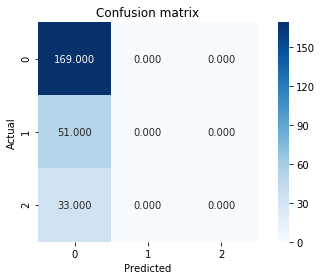

In [16]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 3)
classifier.fit(X_train_scaled, Y_train)

Y_pred = classifier.predict(X_test_scaled) 
# print(Y_pred.T)

features = ['Country'] # Country, Classical music, Pop, Rock

conf_matrix = metrics.confusion_matrix(Y_test['Country'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

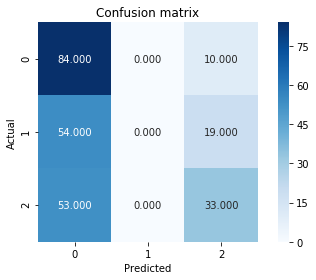

In [17]:
conf_matrix = metrics.confusion_matrix(Y_test['Classical music'], Y_pred.T[1])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

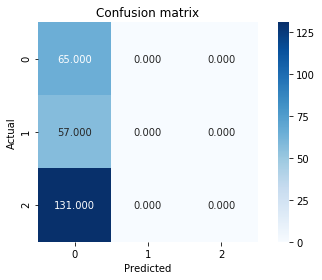

In [18]:
conf_matrix = metrics.confusion_matrix(Y_test['Pop'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

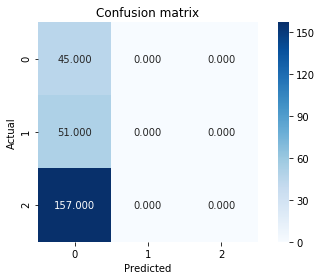

In [19]:
conf_matrix = metrics.confusion_matrix(Y_test['Rock'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [20]:
import warnings
warnings.filterwarnings('ignore')

_all_metrics = []
start_range = 3
for i in range(start_range, 20):
    # KNN classifiers
    classifier = KNeighborsClassifier(n_neighbors = i)  
    classifier.fit(X_train_scaled, Y_train)

    Y_pred = classifier.predict(X_test_scaled) 
    Y_pred_T = Y_pred.T

    # metrics
    _metrics = []
    pred_index = -1;
    for col_name in Y_test:
        pred_index += 1

        _pred = Y_pred_T[pred_index]
        _test = Y_test[col_name]
        m = get_metrics(_test, _pred)

        _metrics.append({col_name: m})
    _all_metrics.append(_metrics)

feature_accuracies = []

for f in y_features:
    _max_based_accuracy = find_max_accuracy(_all_metrics, start_range, f)
    feature_accuracies.append(_max_based_accuracy)

    
for f in range(len(feature_accuracies)):
    displaying_metrics(feature_accuracies[f], y_features[f], 'KNN ')


Feature Name:  Country
KNN  17
precision:  [0.67346939 0.5        0.        ]
recall:  [0.97633136 0.07843137 0.        ]
f1_score:  [0.79710145 0.13559322 0.        ]
accuracy:  0.6679841897233202
error:  0.3320158102766798


Feature Name:  Classical music
KNN  17
precision:  [0.67346939 0.5        0.        ]
recall:  [0.97633136 0.07843137 0.        ]
f1_score:  [0.79710145 0.13559322 0.        ]
accuracy:  0.6679841897233202
error:  0.3320158102766798


Feature Name:  Pop
KNN  17
precision:  [0.67346939 0.5        0.        ]
recall:  [0.97633136 0.07843137 0.        ]
f1_score:  [0.79710145 0.13559322 0.        ]
accuracy:  0.6679841897233202
error:  0.3320158102766798


Feature Name:  Rock
KNN  17
precision:  [0.67346939 0.5        0.        ]
recall:  [0.97633136 0.07843137 0.        ]
f1_score:  [0.79710145 0.13559322 0.        ]
accuracy:  0.6679841897233202
error:  0.3320158102766798




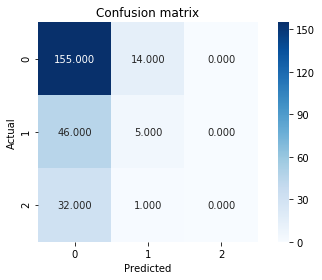

In [21]:
# best KNN based on the range 3-20
classifier = KNeighborsClassifier(n_neighbors = 11)  
classifier.fit(X_train_scaled, Y_train)

Y_pred = classifier.predict(X_test_scaled) 

features = ['Country'] # Country, Classical music, Pop, Rock

conf_matrix = metrics.confusion_matrix(Y_test['Country'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

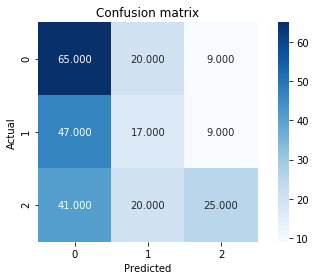

In [22]:
conf_matrix = metrics.confusion_matrix(Y_test['Classical music'], Y_pred.T[1])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

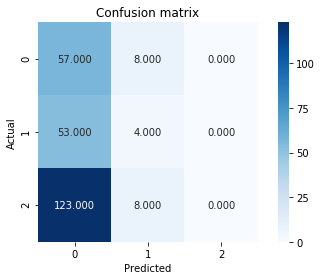

In [23]:
conf_matrix = metrics.confusion_matrix(Y_test['Pop'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

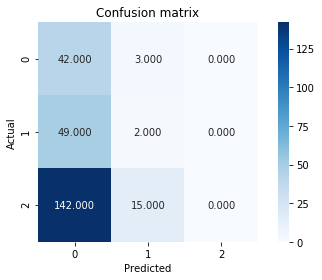

In [24]:
conf_matrix = metrics.confusion_matrix(Y_test['Rock'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [25]:
# clustering using k-means clustering
def get_clustering_metrics(data, feature):
    adjusted_rand_index = adjusted_rand_score(data[feature], data['clusters'])
    silhouette_coefficient = silhouette_score(data, clusters, metric = "euclidean")
    return {'adjusted_rand_index': adjusted_rand_index, 'silhouette_coefficient': silhouette_coefficient}

col_names = list(data.columns.values)

use_this_cluster = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(data)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

for f in y_features:
    _ret = get_clustering_metrics(data, f)
#     print(f, ' ', _ret)

count = 0
# for c in col_names:
#     for f in y_features:
#         ax = data.plot(kind = 'scatter', x = c, y = f, c = 'clusters', colormap = plt.cm.brg)
#         ax.set(title = (f+ ' Plots: ' + c), xlabel = c, ylabel = f)

# #     count += 1
# #     if count == 10:
# #         break
    
# print(_ret)




In [26]:
# clustering using k-means clustering
def find_max_silhouett_coeff(_all_metrics, cluster_no):
    max_silhouette_coefficient = -1
    use_this_one = {}
    
    for cluster_info in _all_metrics:
        silhouette_coefficient = cluster_info[cluster_no]['silhouette_coefficient']
        adjusted_rand_index = cluster_info[cluster_no]['adjusted_rand_index']
        
        if max_silhouette_coefficient < silhouette_coefficient:
            max_silhouette_coefficient = silhouette_coefficient
            use_this_one = {'cluster_no: ': cluster_no, 'silhouette_coefficient': silhouette_coefficient, 'adjusted_rand_index': adjusted_rand_index}

        cluster_no += 1
    return use_this_one

def display_cluster (feature, _metrics):
    print('\nFeature Name: ', feature);
    print(_metrics)
#     print(_metrics['cluster_no'])
#     print('cluster_no: ', _metrics['cluster_no'])
#     print('silhouette_coefficient: ', _metrics['silhouette_coefficient'])
#     print('adjusted_rand_index: ', _metrics['adjusted_rand_index'])

def find_max_adjusted_rand_index():
    max_adjusted_rand_index = -1
    return max_adjusted_rand_index
    
def get_clustering_metrics(data, feature):
    adjusted_rand_index = adjusted_rand_score(data[feature], data['clusters'])
    silhouette_coefficient = silhouette_score(data, clusters, metric = "euclidean")
    return {'adjusted_rand_index': adjusted_rand_index, 'silhouette_coefficient': silhouette_coefficient}

col_names = list(data.columns.values)


_metrics = []
start = 2
end = 10


_max_metrics_all_features = []
for f in y_features:
    _metrics = []
    tmp = data.drop(f, axis = 1)
#     display(tmp)
    for no_clusters in range(start, end):
        use_this_cluster = KMeans(n_clusters = no_clusters, init = 'random', n_init = 1, random_state = 2).fit(tmp)
        clusters = use_this_cluster.labels_
        tmp['clusters'] = clusters
        _ret = get_clustering_metrics(data, f)
        
        _metrics.append({no_clusters:_ret})
        
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start)
    _max_metrics_all_features.append(_max_silhouett_coeff)
    
count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'cluster_no: ': 3, 'silhouette_coefficient': 0.3753882197681181, 'adjusted_rand_index': 0.007553462387691556}

Feature Name:  Classical music
{'cluster_no: ': 3, 'silhouette_coefficient': 0.3753882197681181, 'adjusted_rand_index': -0.00023243386321271224}

Feature Name:  Pop
{'cluster_no: ': 3, 'silhouette_coefficient': 0.3753882197681181, 'adjusted_rand_index': 0.008888773259566048}

Feature Name:  Rock
{'cluster_no: ': 3, 'silhouette_coefficient': 0.3753882197681181, 'adjusted_rand_index': 0.0002119833872589302}


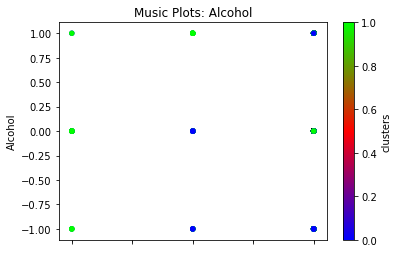

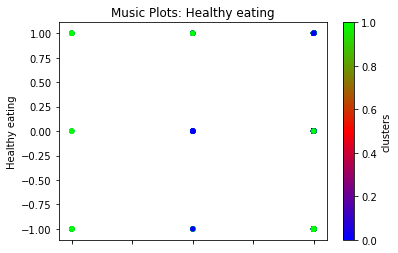

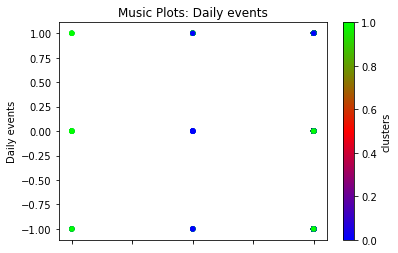

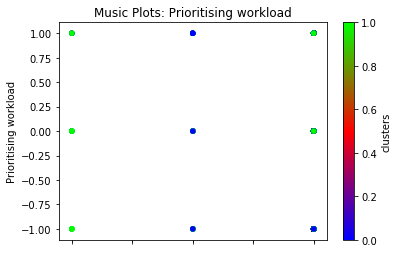

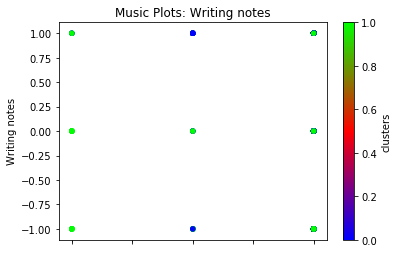

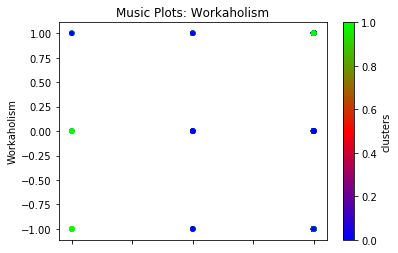

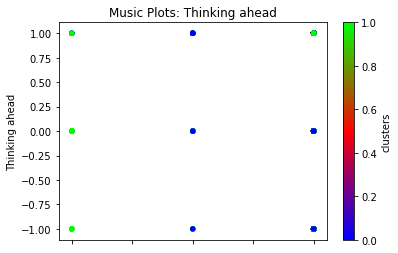

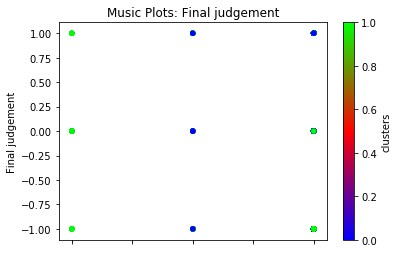

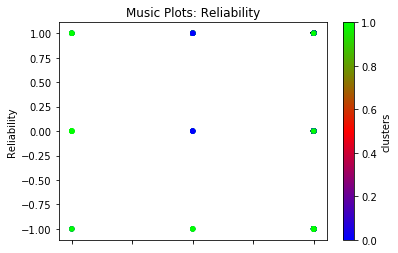

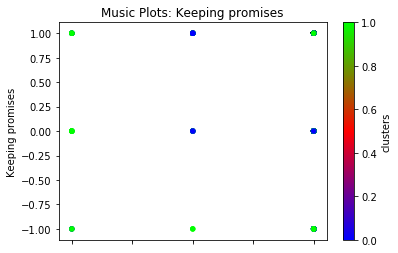

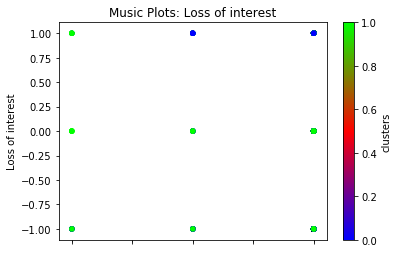

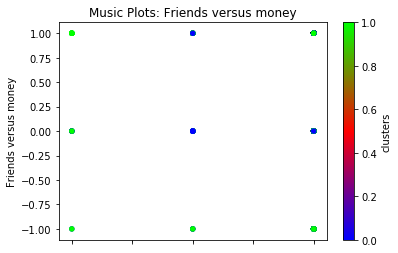

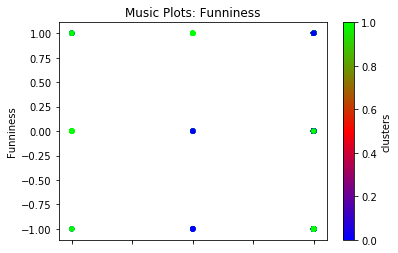

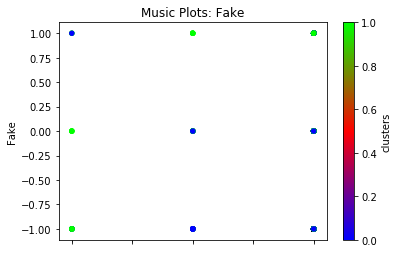

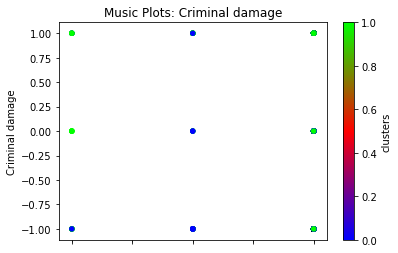

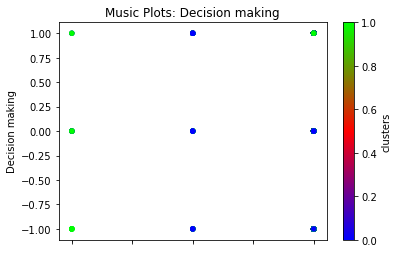

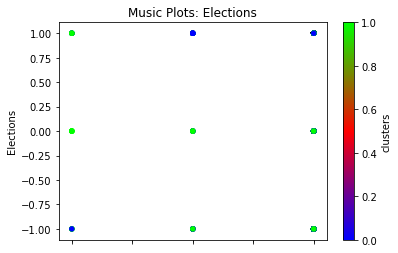

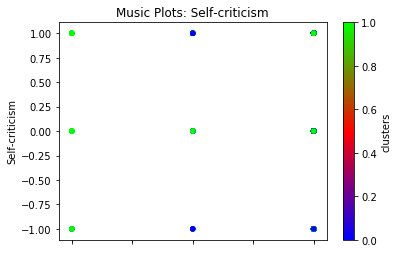

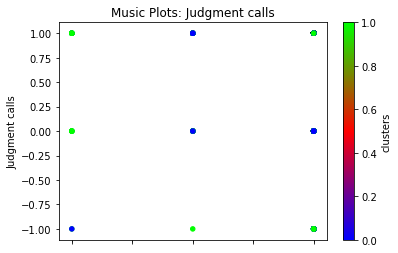

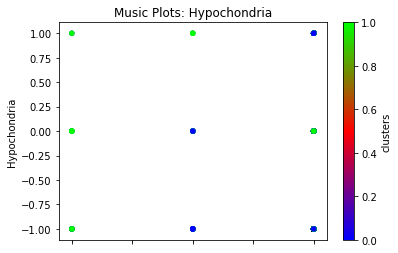

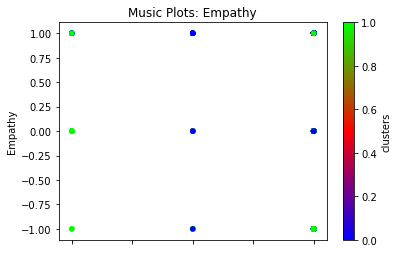

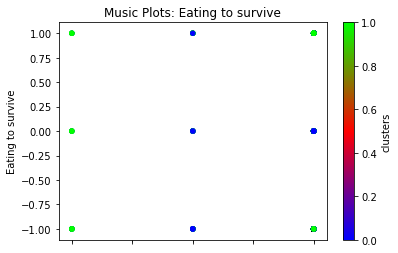

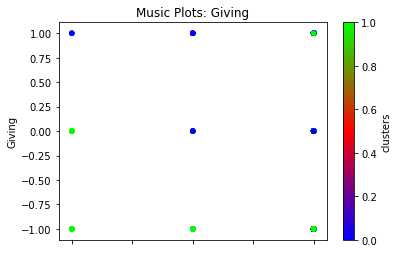

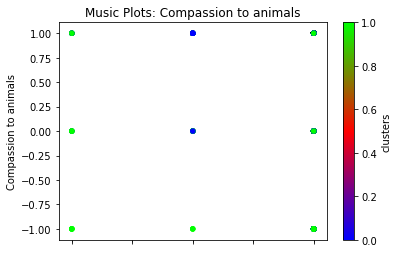

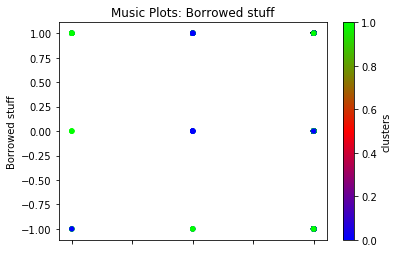

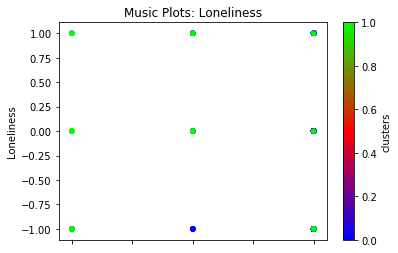

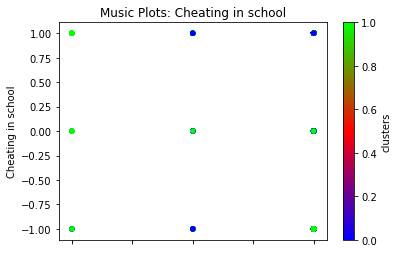

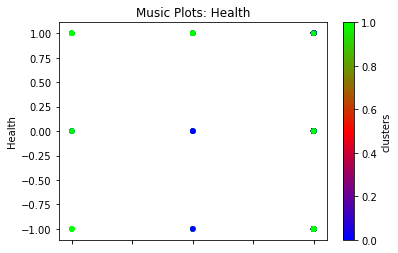

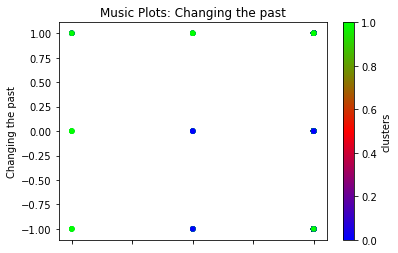

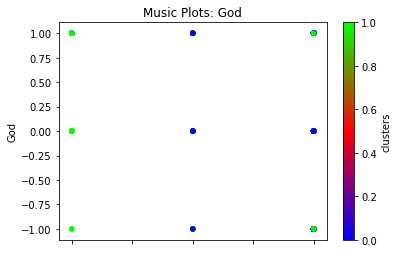

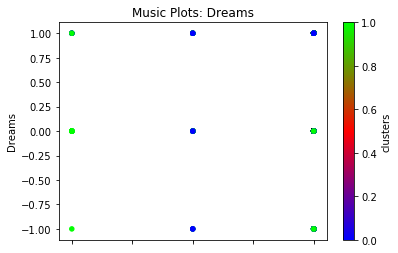

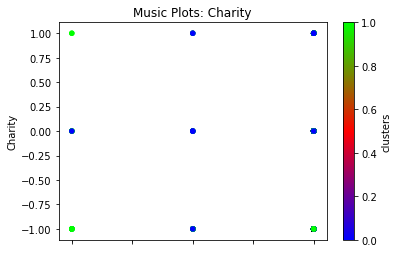

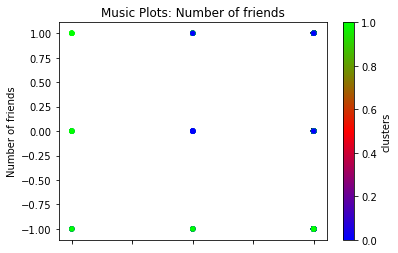

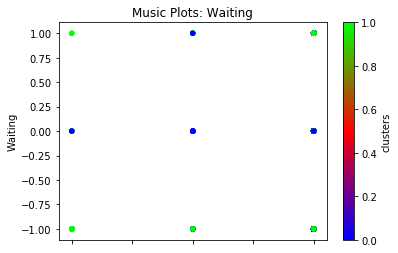

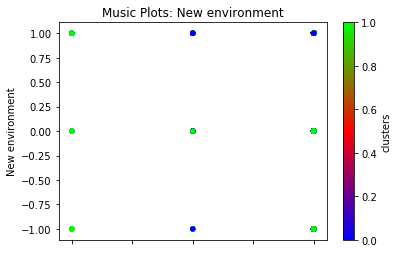

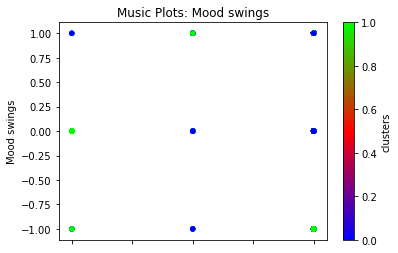

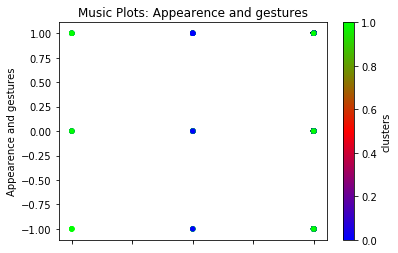

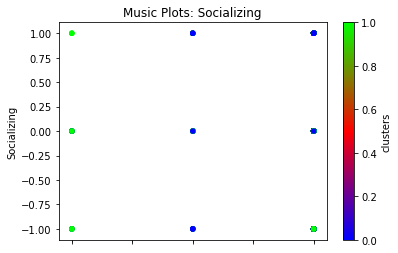

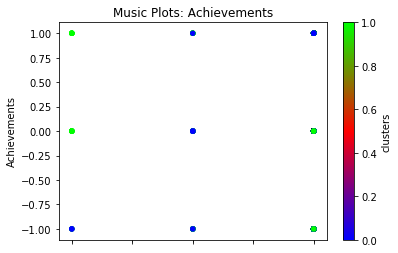

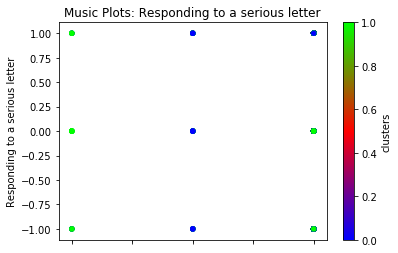

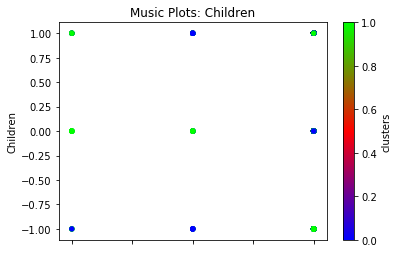

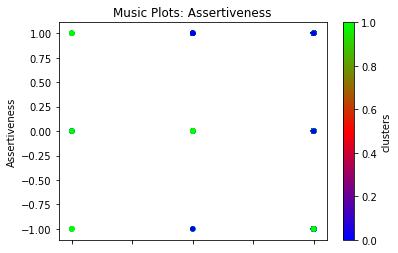

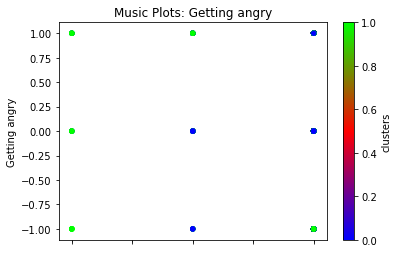

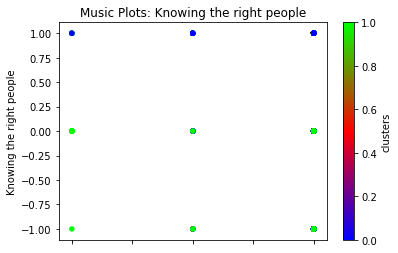

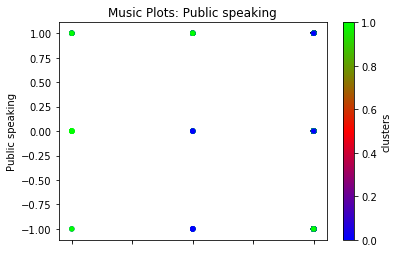

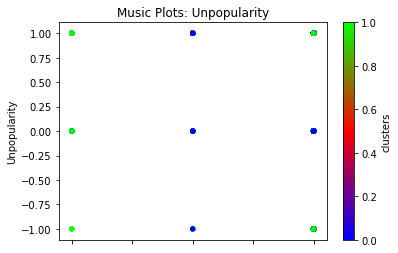

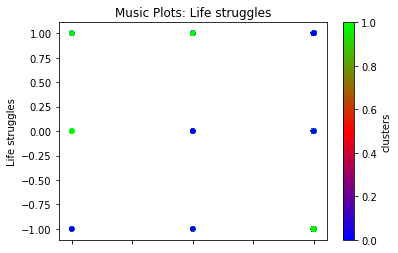

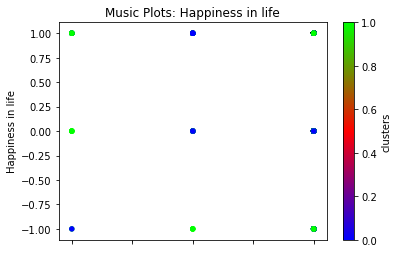

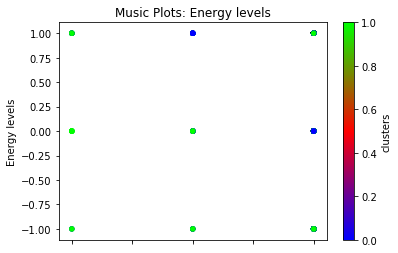

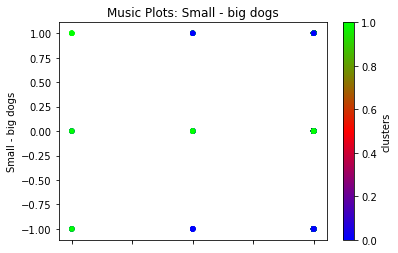

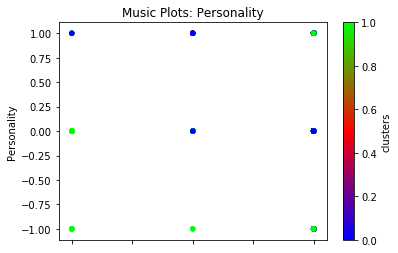

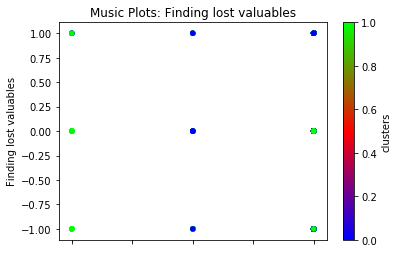

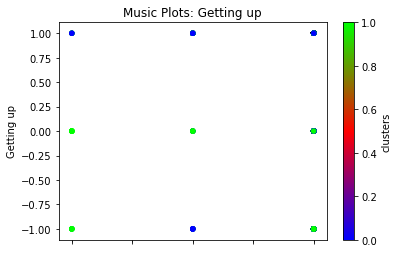

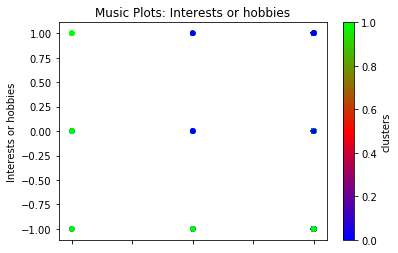

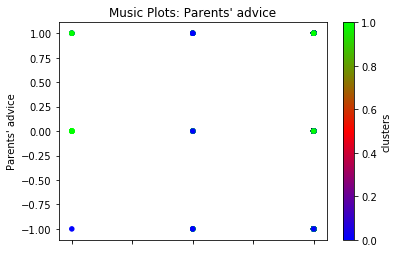

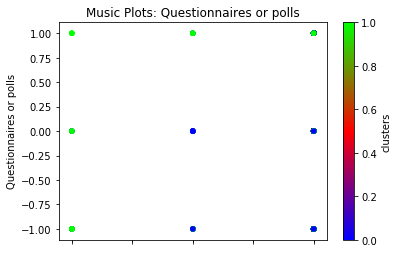

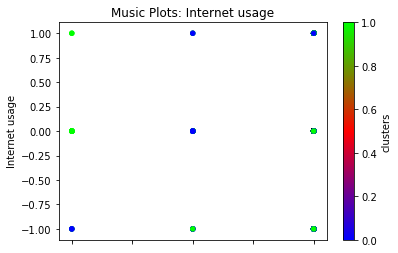

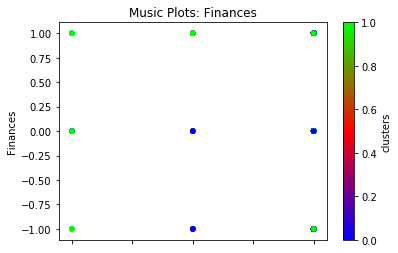

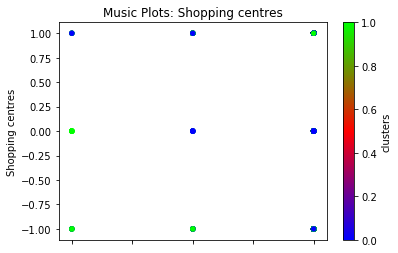

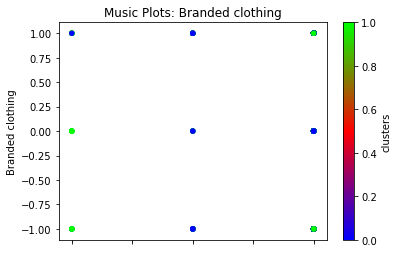

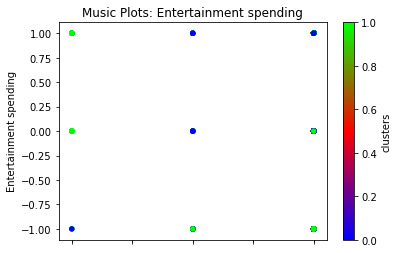

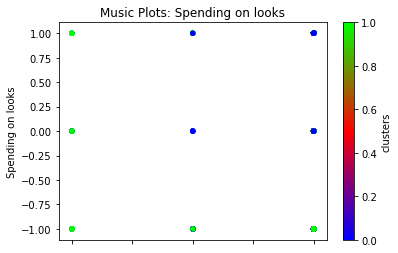

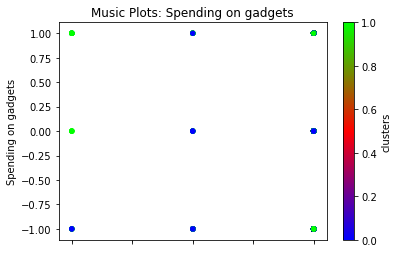

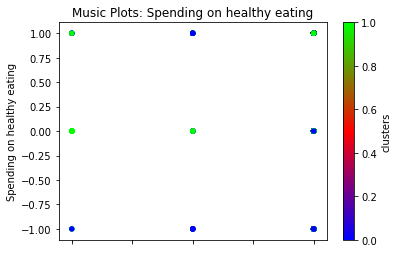

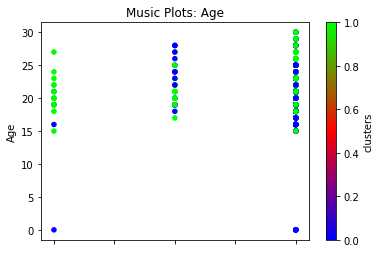

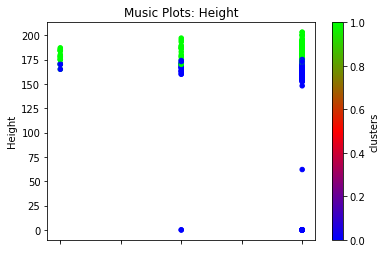

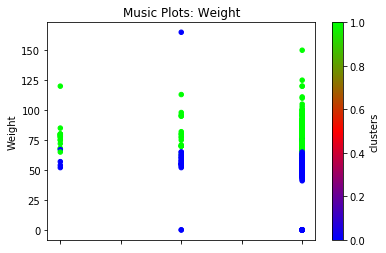

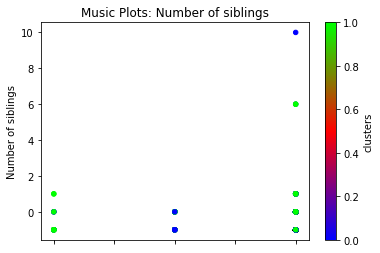

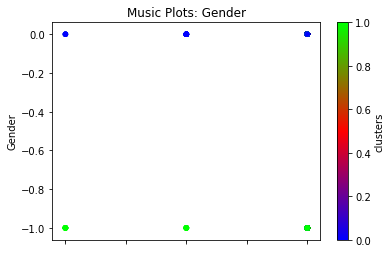

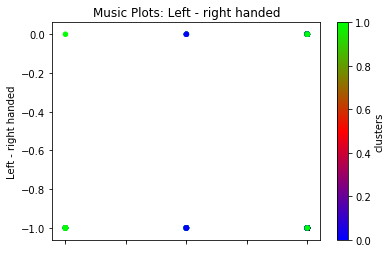

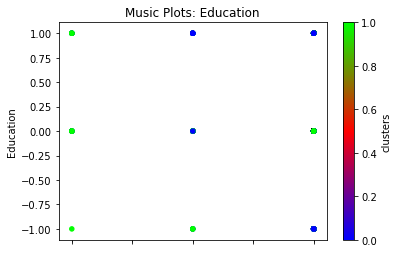

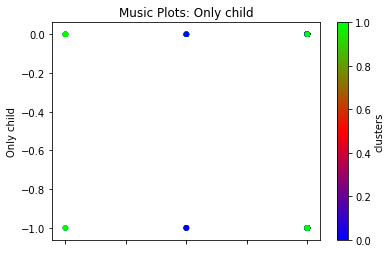

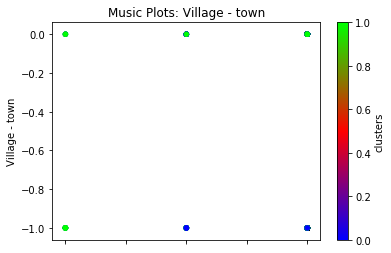

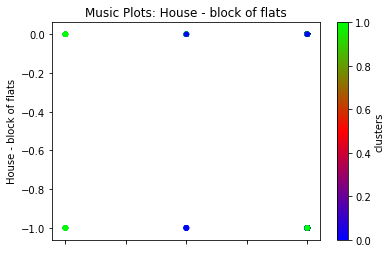

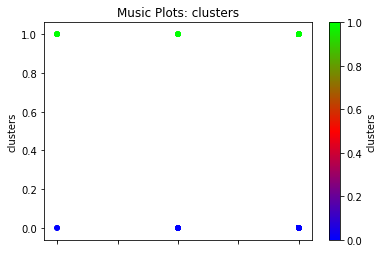

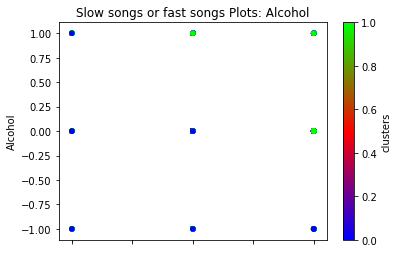

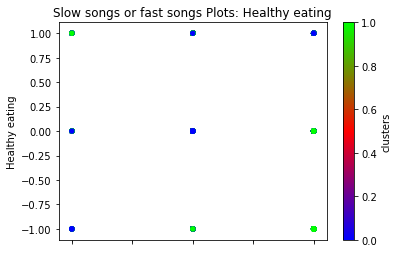

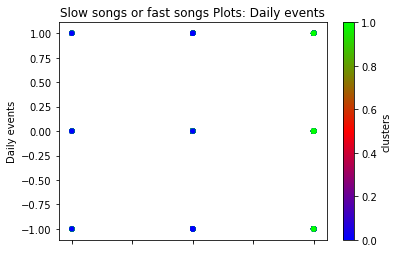

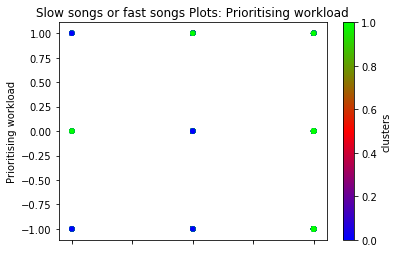

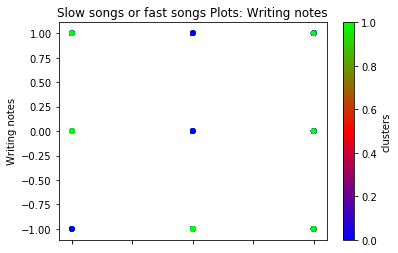

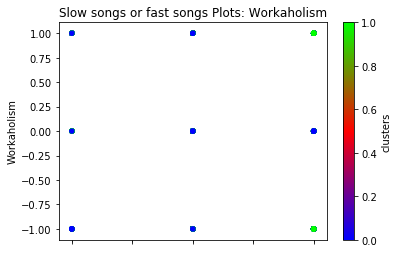

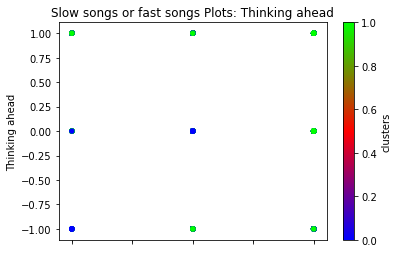

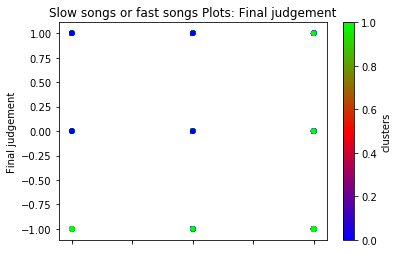

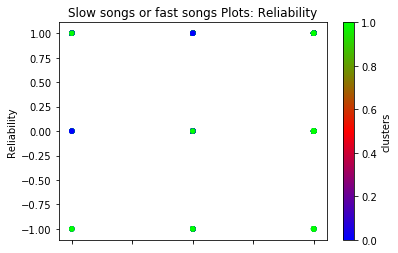

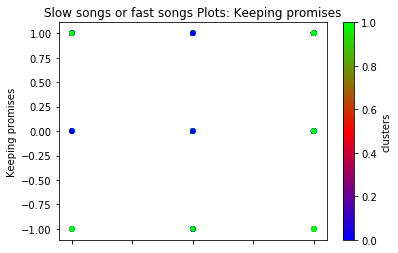

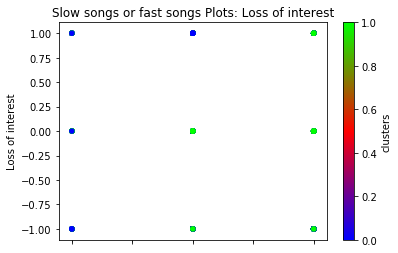

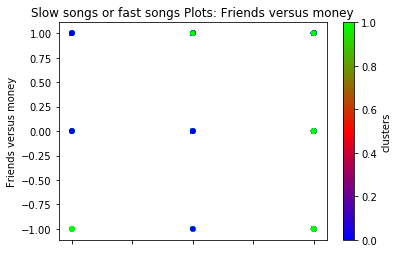

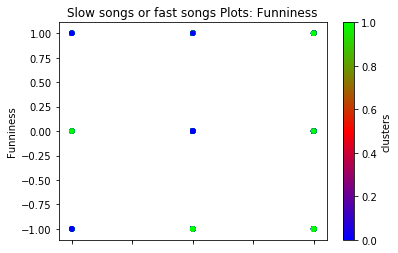

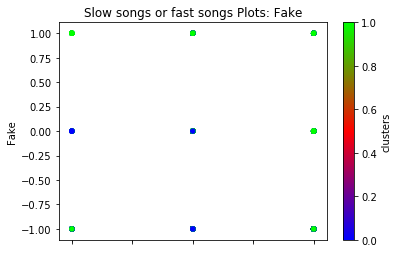

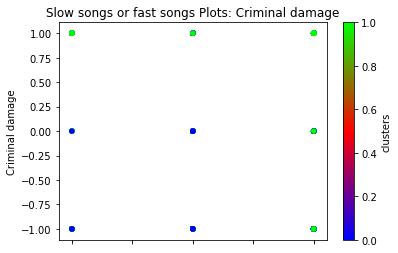

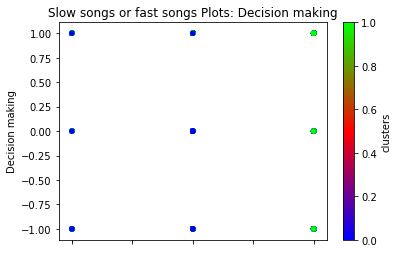

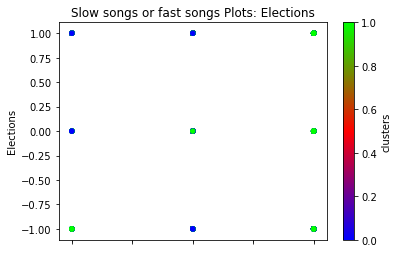

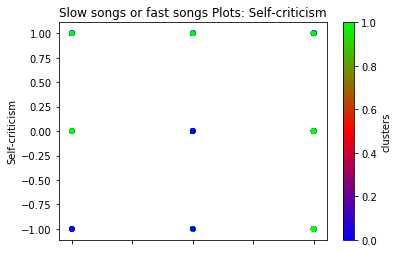

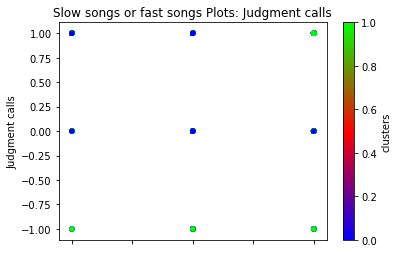

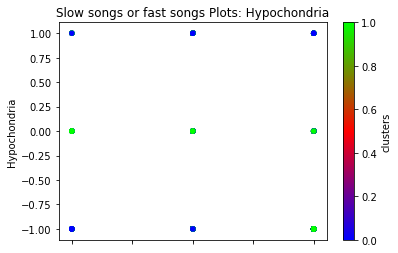

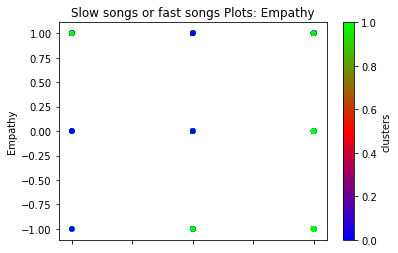

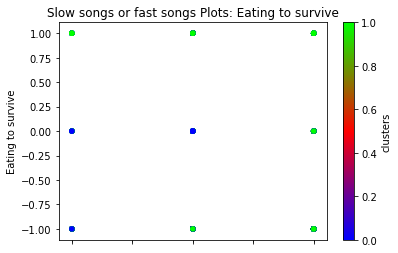

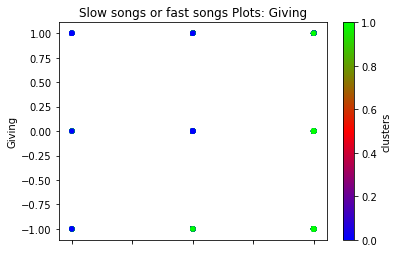

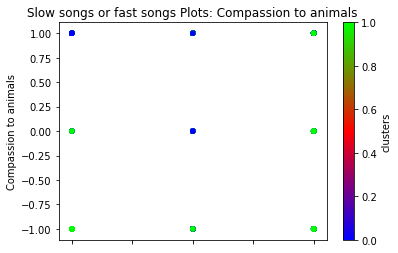

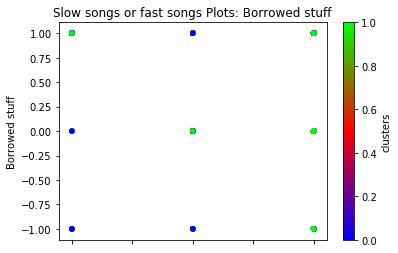

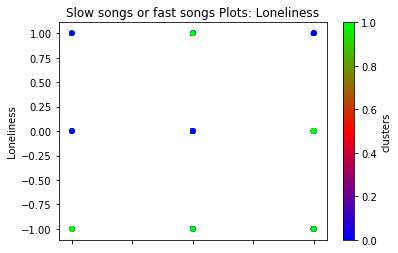

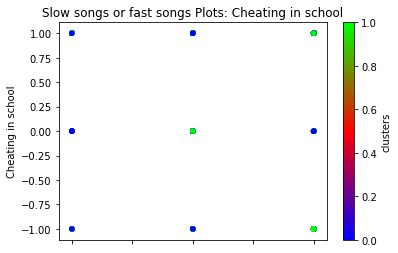

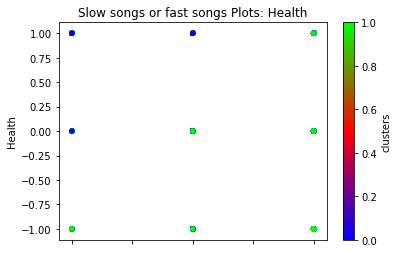

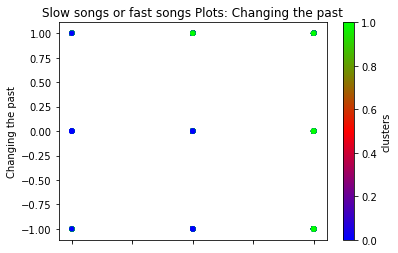

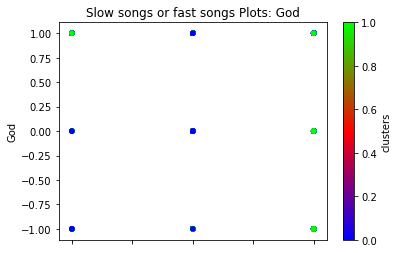

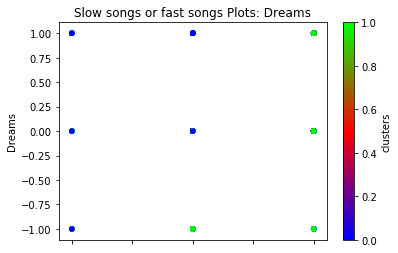

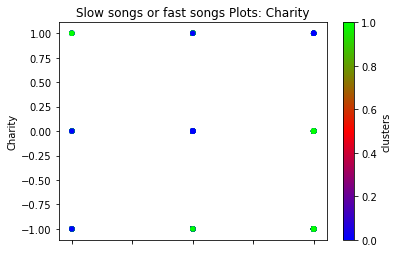

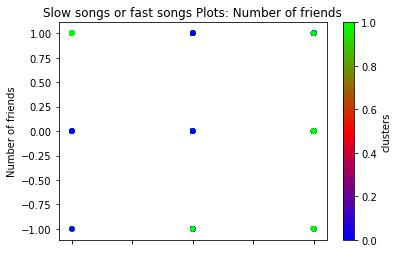

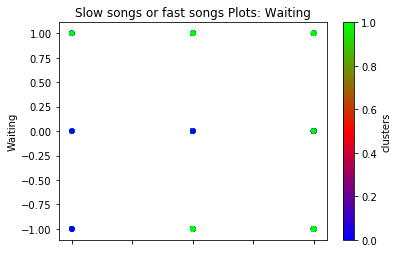

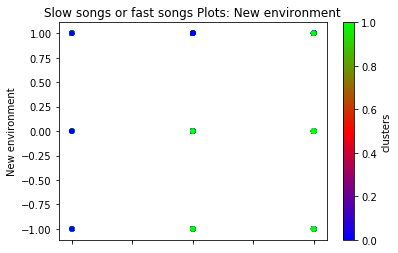

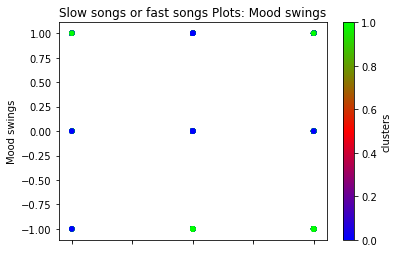

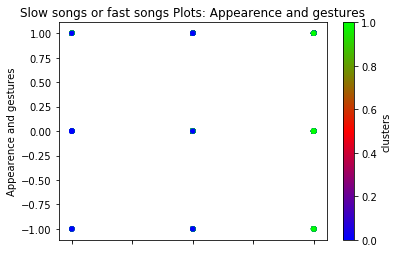

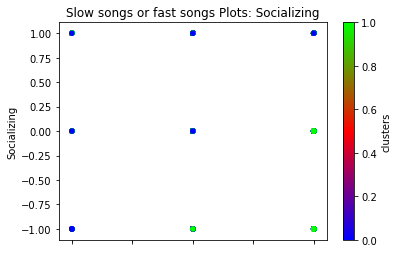

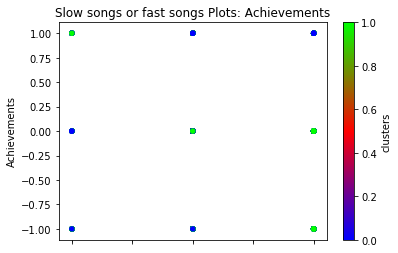

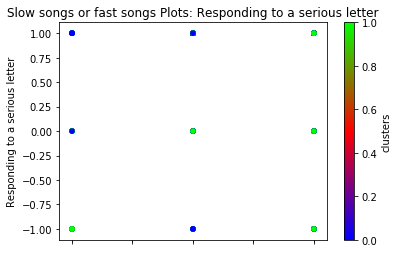

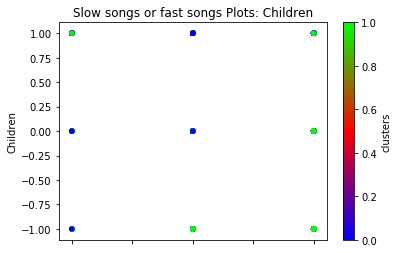

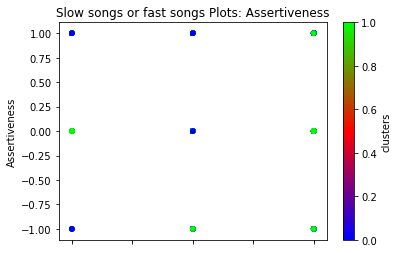

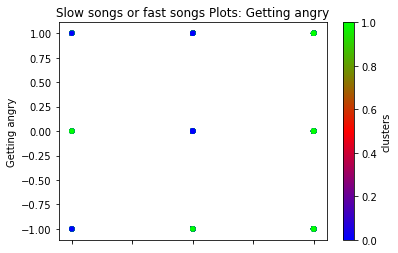

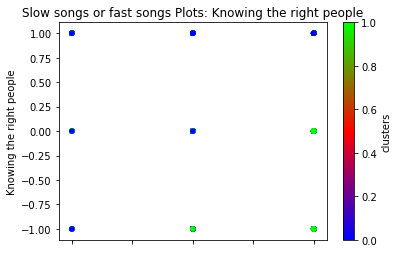

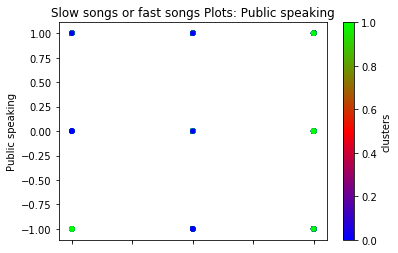

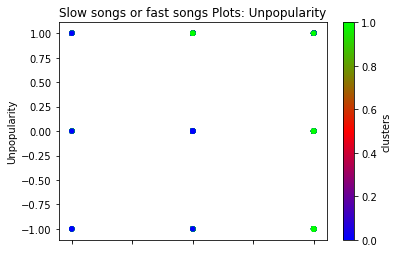

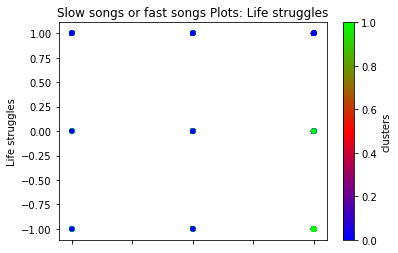

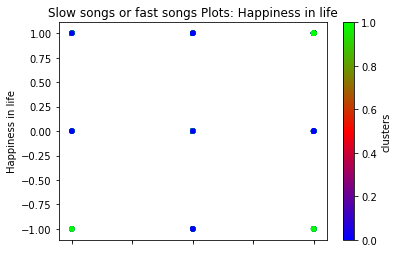

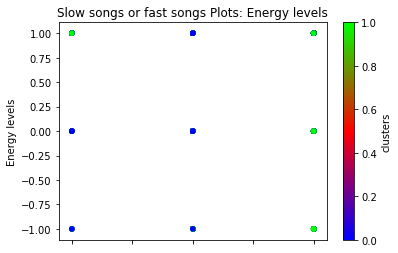

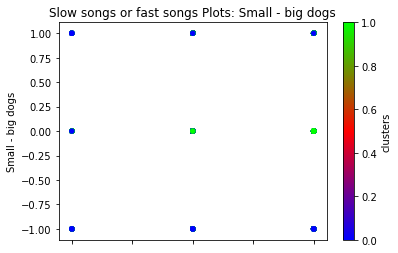

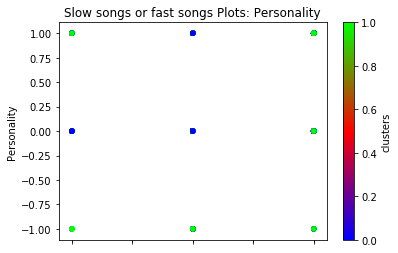

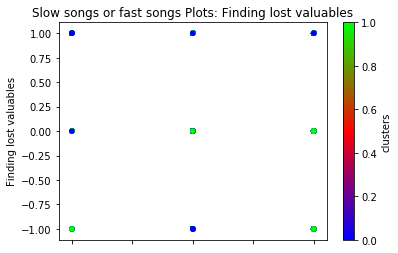

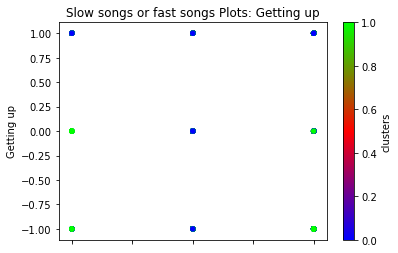

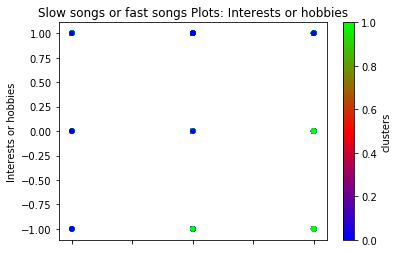

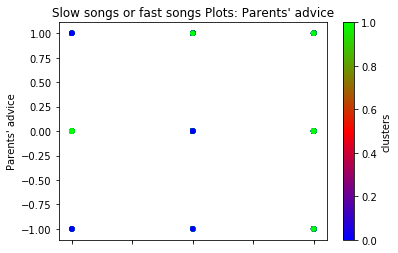

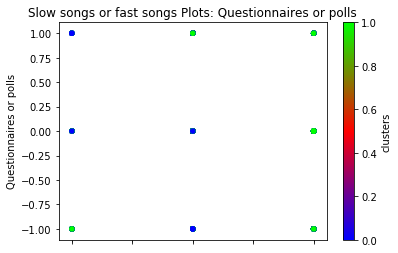

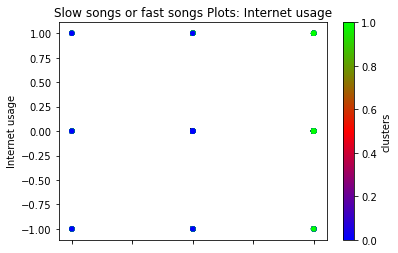

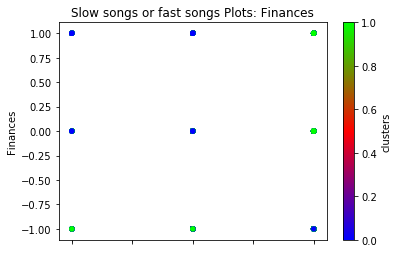

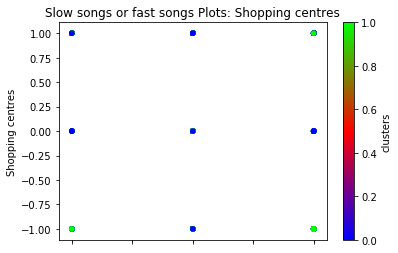

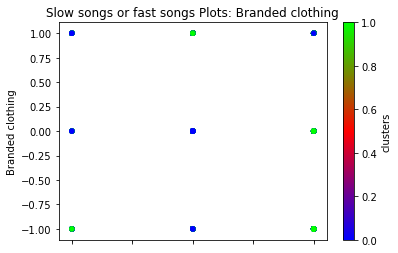

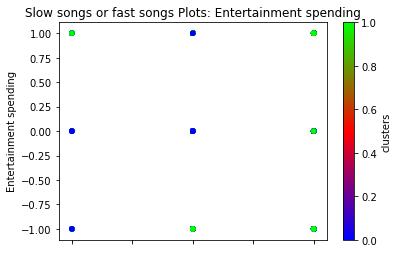

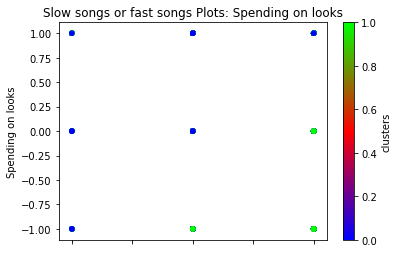

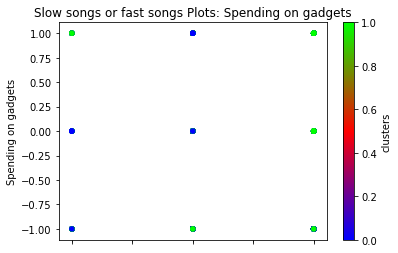

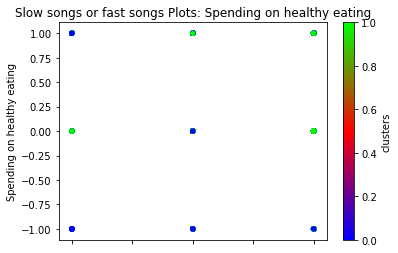

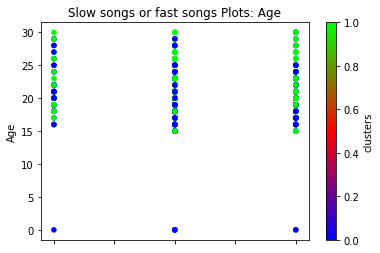

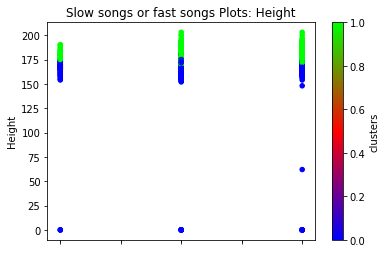

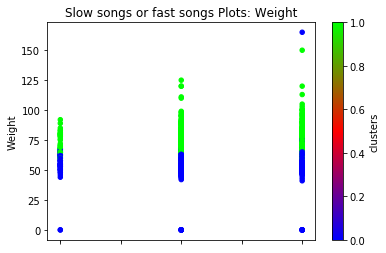

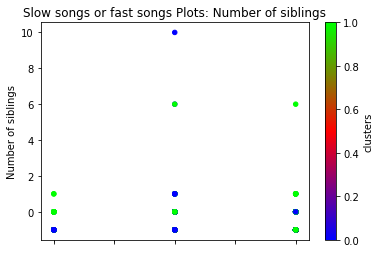

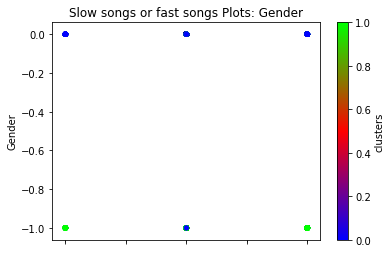

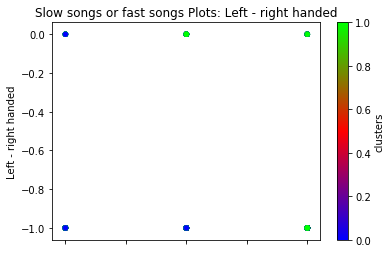

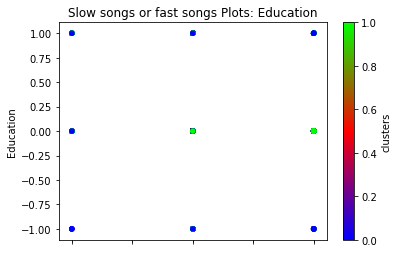

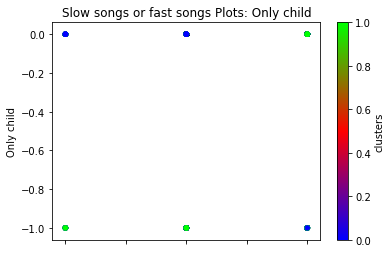

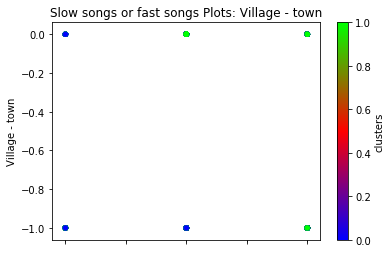

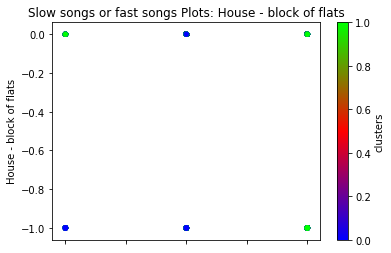

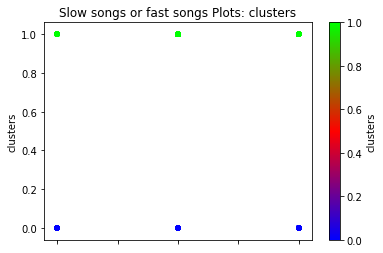

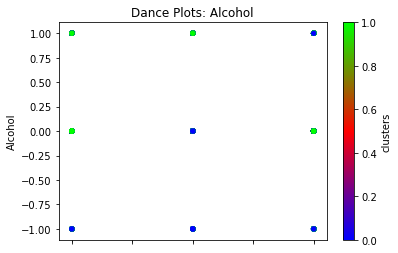

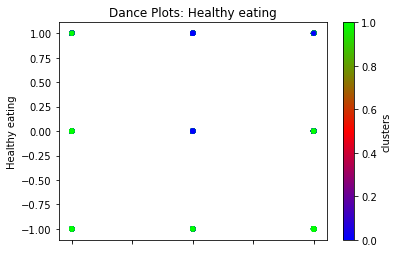

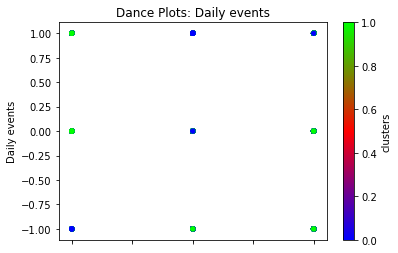

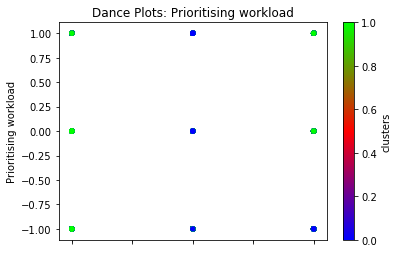

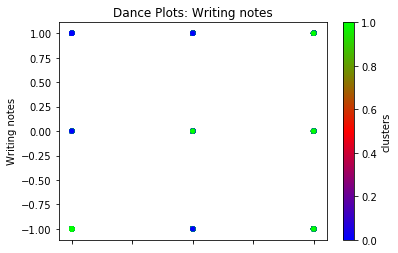

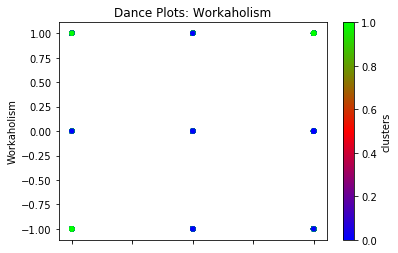

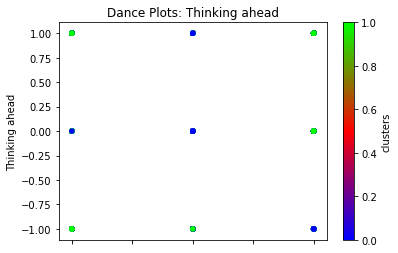

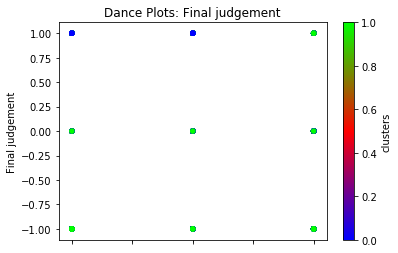

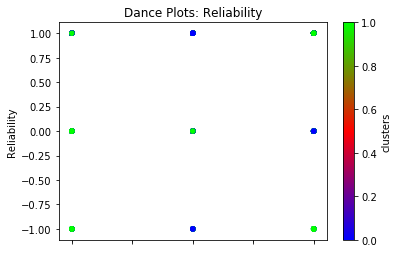

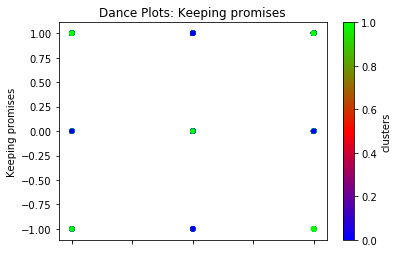

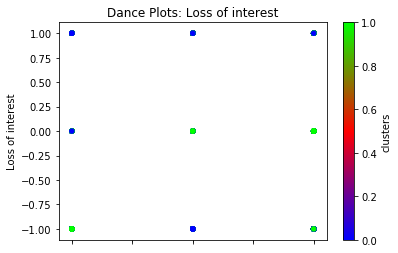

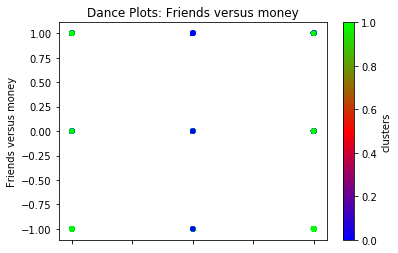

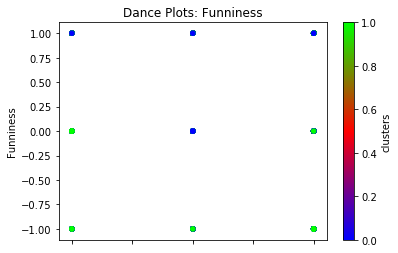

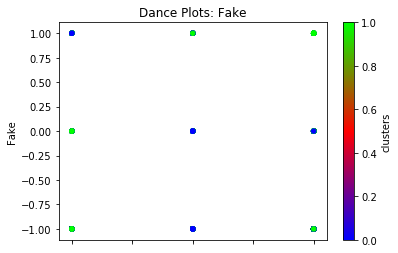

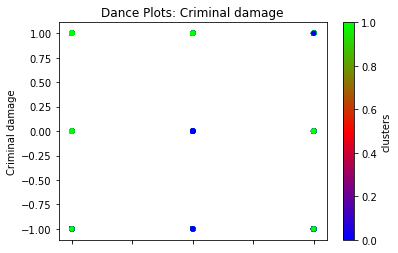

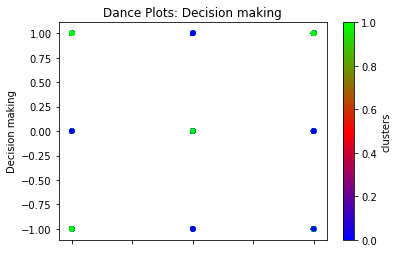

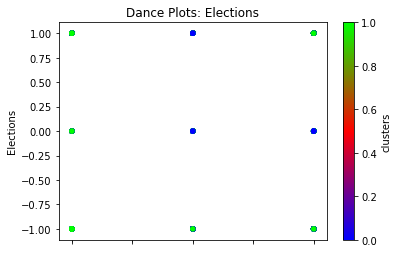

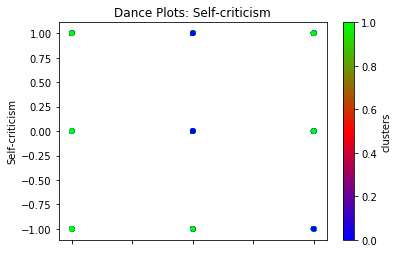

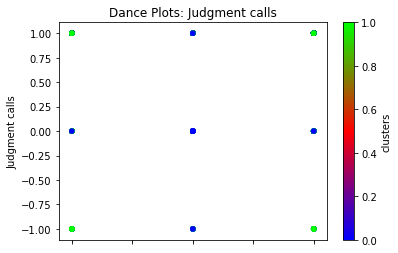

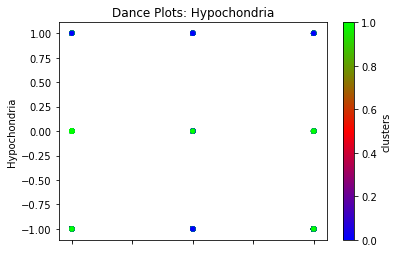

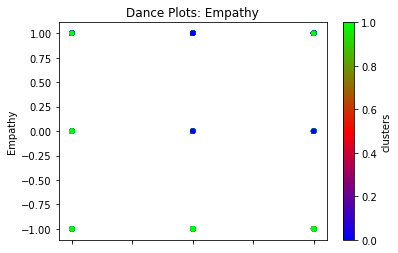

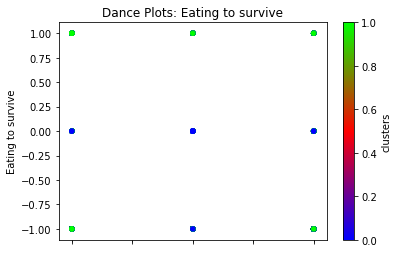

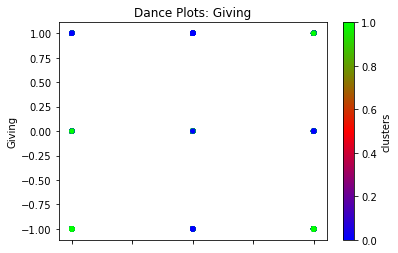

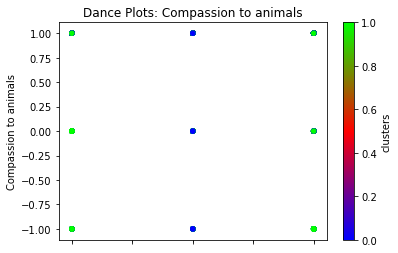

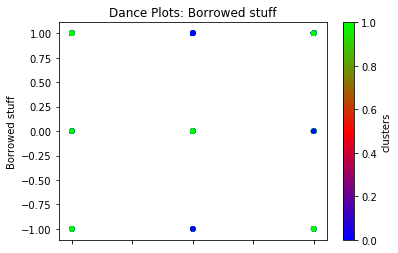

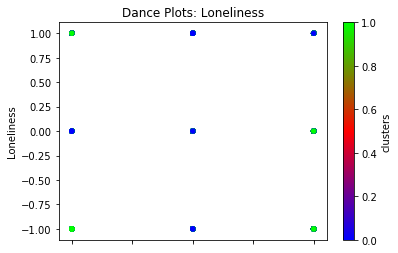

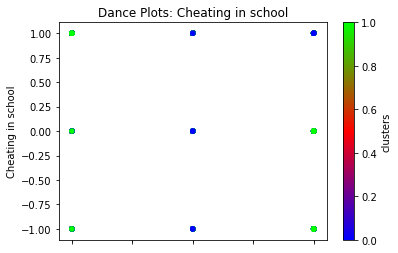

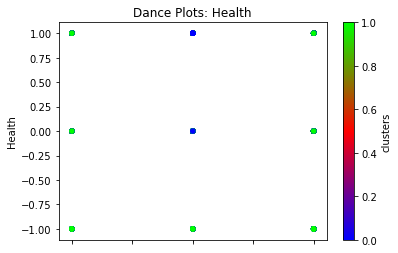

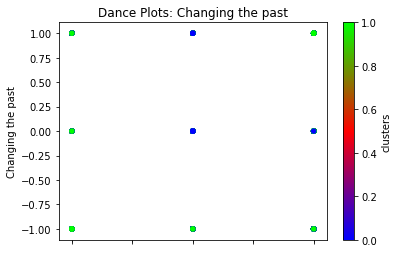

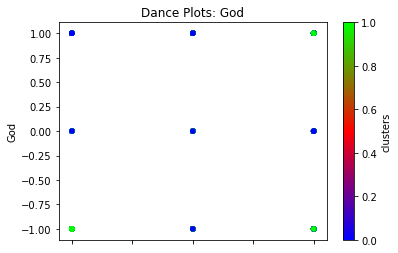

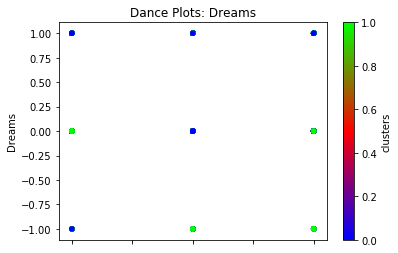

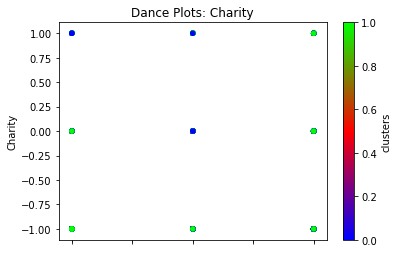

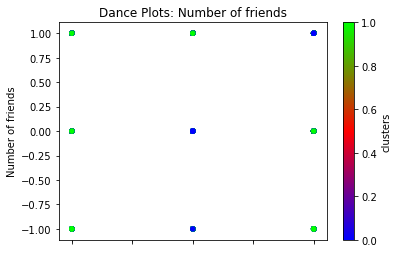

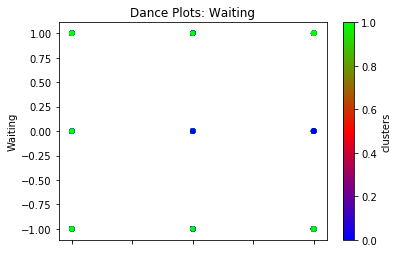

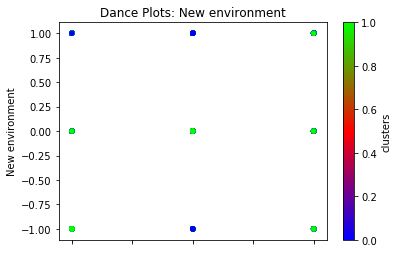

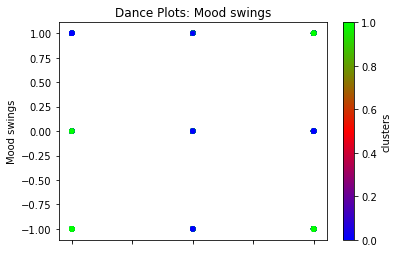

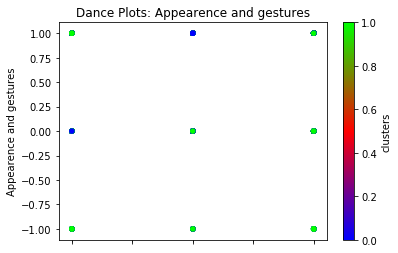

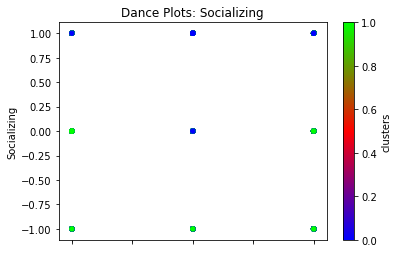

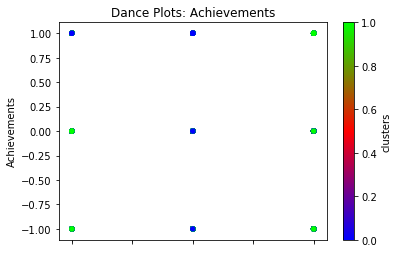

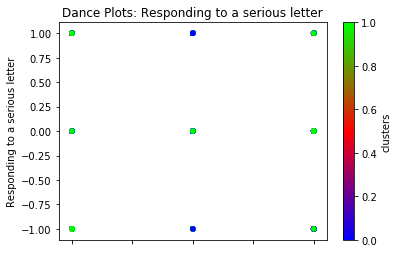

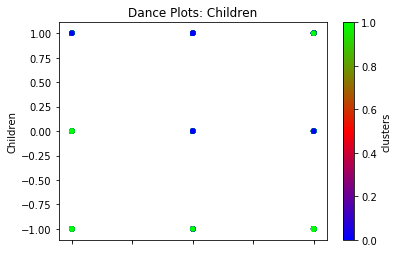

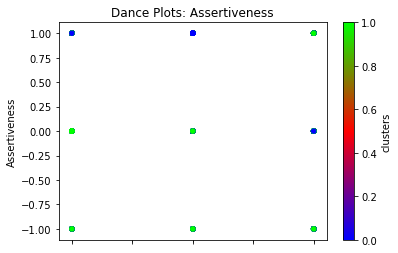

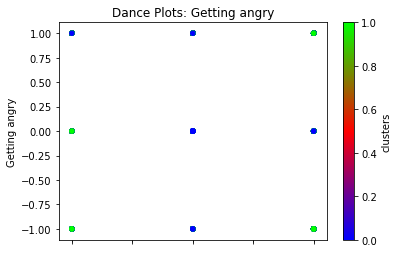

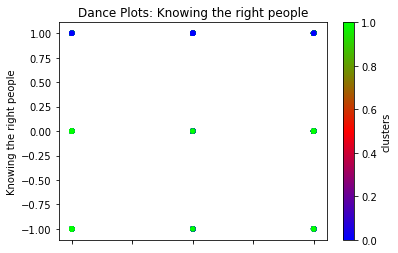

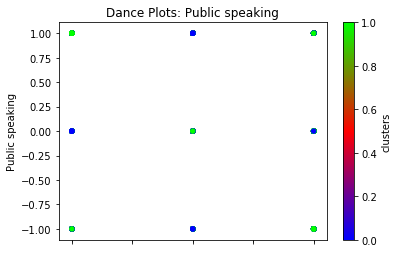

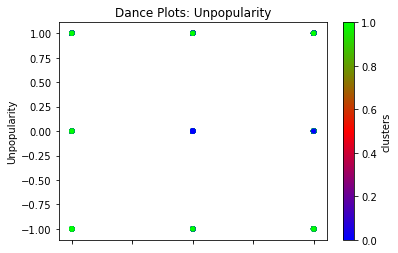

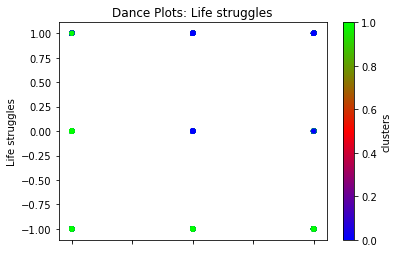

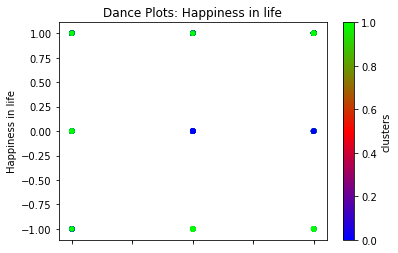

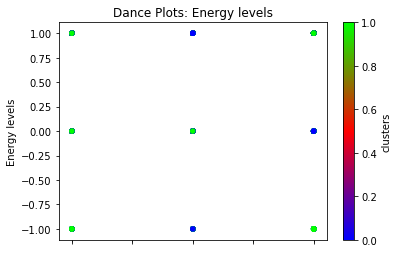

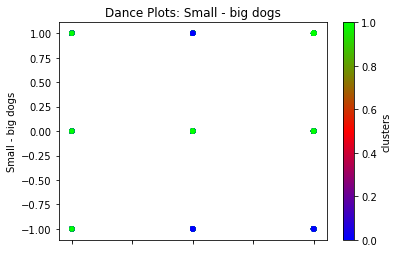

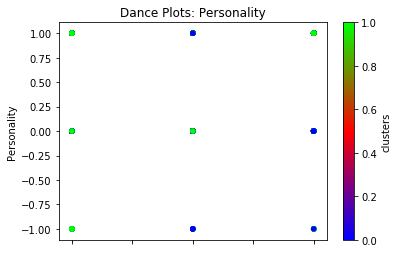

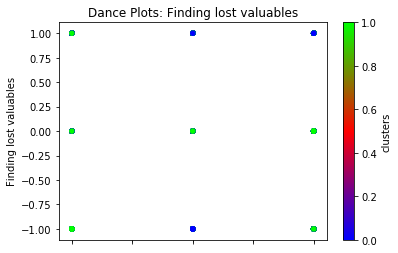

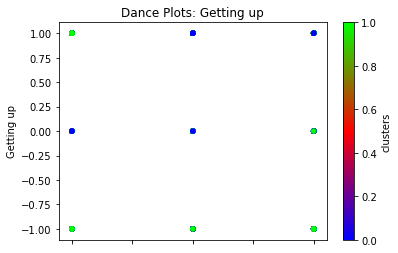

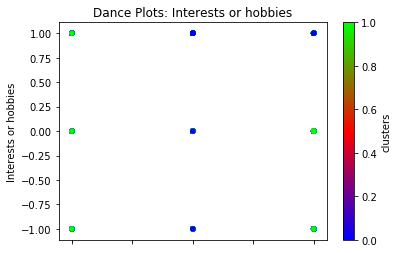

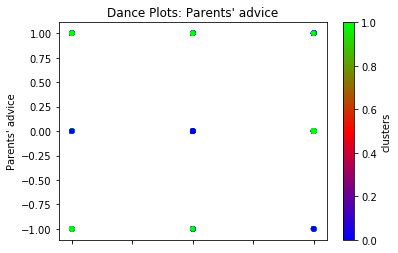

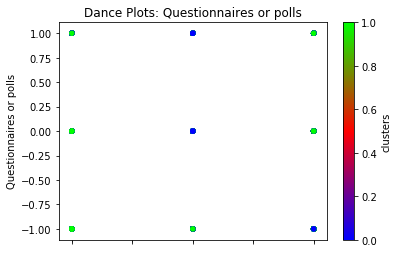

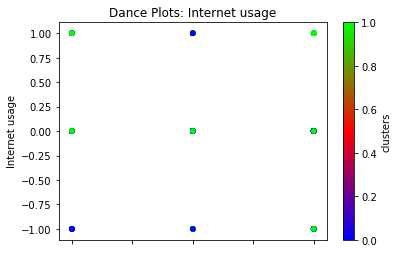

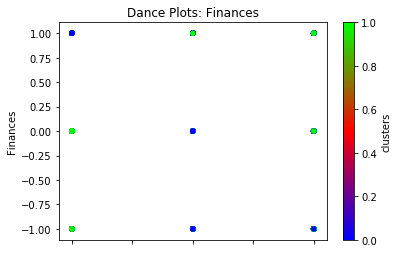

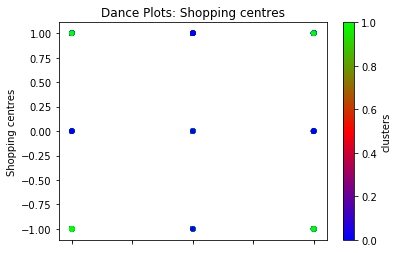

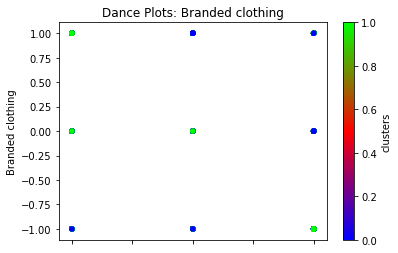

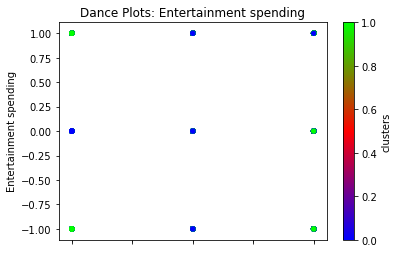

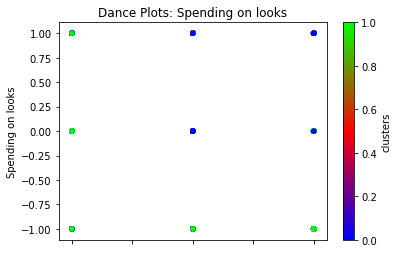

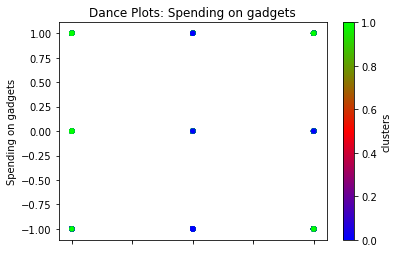

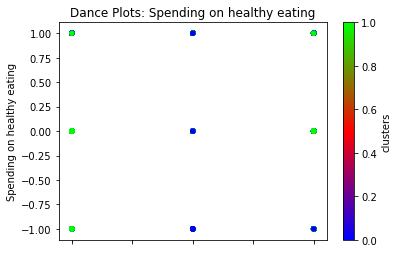

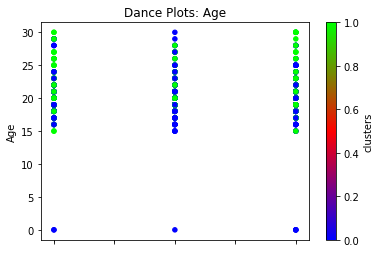

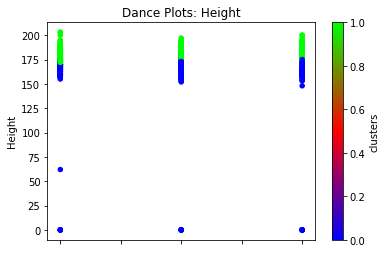

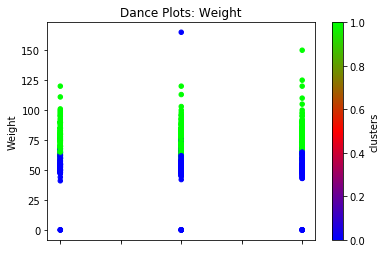

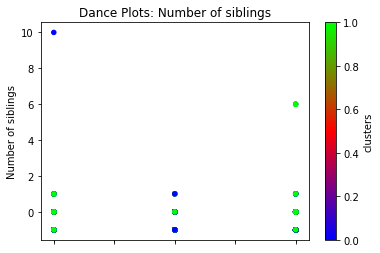

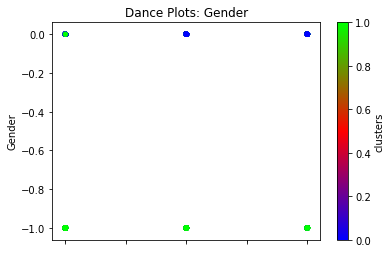

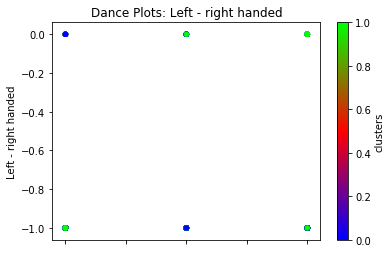

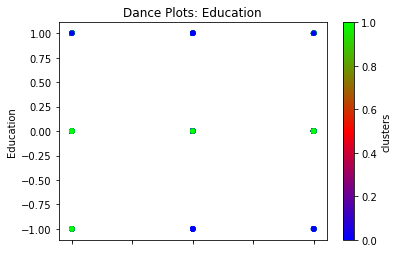

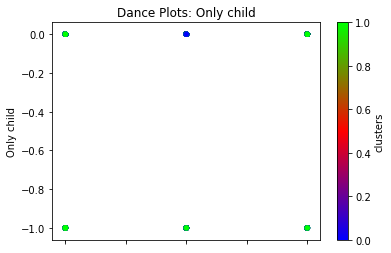

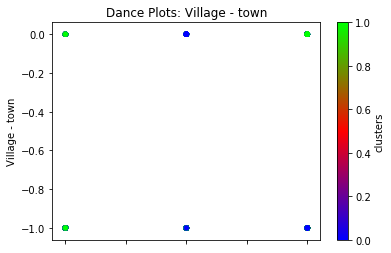

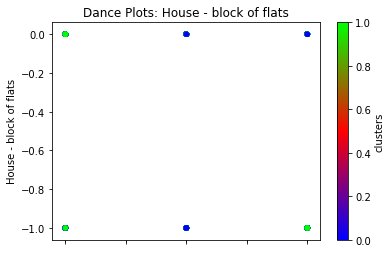

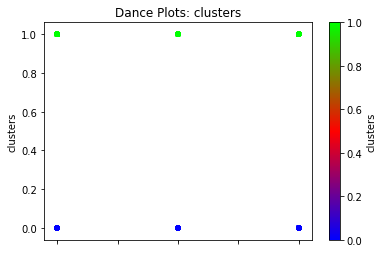

In [27]:
count = 0
# print(len(col_names))
z = int(len(col_names)/2)

# print(z)
x_features_1 = col_names[0:z]
x_features_2 = col_names[z:len(col_names)]

# print(len(x_features_1))
# print(len(x_features_2))

for x1 in x_features_1:
    for x2 in x_features_2:
        ax = data.plot(kind = 'scatter', x = x1, y = x2, c = 'clusters', colormap = plt.cm.brg)
        ax.set(title = (x1+ ' Plots: ' + x2), xlabel = x1, ylabel = x2)

#     for f in y_feature:
    count += 1
    if count == 3:
        break
    
# print(_ret)

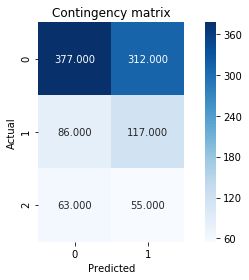

In [28]:
# using the highest siluette coeff
use_this_cluster = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(data)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Country'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

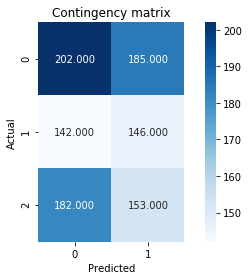

In [29]:
cont_matrix = metrics.cluster.contingency_matrix(data['Classical music'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

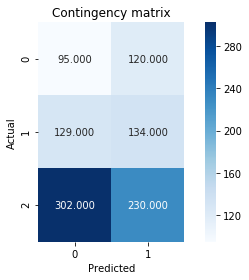

In [30]:
cont_matrix = metrics.cluster.contingency_matrix(data['Pop'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

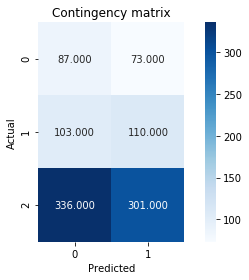

In [31]:
cont_matrix = metrics.cluster.contingency_matrix(data['Rock'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [32]:
def find_max_silhouett_coeff(_all_metrics, cluster_no):
    max_silhouette_coefficient = -1
    use_this_one = {}
          
    for cluster_info in _all_metrics:
#         print(cluster_info)
        silhouette_coefficient = cluster_info[cluster_no]['silhouette_coefficient']
        adjusted_rand_index = cluster_info[cluster_no]['adjusted_rand_index']
        
        if max_silhouette_coefficient < silhouette_coefficient:
            max_silhouette_coefficient = silhouette_coefficient
            use_this_one = {'cluster_no: ': cluster_no, 'silhouette_coefficient': silhouette_coefficient, 'adjusted_rand_index': adjusted_rand_index}

        cluster_no += 1
    return use_this_one

_features = ['Country']
# for y_feature in y_features:
total_samples = 10
_max_metrics_all_features = []
start = 2

for y_feature in _features:
    _metrics = []
    for sample in range(start, total_samples):
        tmp = data.drop(y_feature, axis = 1)
        clustering = DBSCAN(eps = 1, min_samples = sample, metric = "euclidean").fit(tmp)
        clusters = clustering.labels_       
        _metrics.append({sample:_ret})
#     print("met ",_metrics)
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start)
    _max_metrics_all_features.append(_max_silhouett_coeff)


count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'cluster_no: ': 2, 'silhouette_coefficient': 0.13981666323808706, 'adjusted_rand_index': 0.0002119833872589302}


In [33]:

_features = ['Country']
# for y_feature in y_features:
total_samples = 10
_max_metrics_all_features = []
start = 2

_eps = 0

for y_feature in _features:
    _metrics = []
    _eps += 1
    for sample in range(start, total_samples):
        tmp = data.drop(y_feature, axis = 1)
        clustering = DBSCAN(eps = _eps, min_samples = sample, metric = "euclidean").fit(tmp)
        clusters = clustering.labels_       
        _metrics.append({sample:_ret})
#     print("met ",_metrics)
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start)
    _max_metrics_all_features.append(_max_silhouett_coeff)


count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'cluster_no: ': 2, 'silhouette_coefficient': 0.13981666323808706, 'adjusted_rand_index': 0.0002119833872589302}


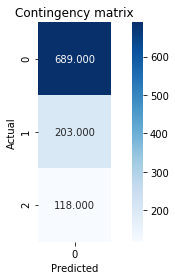

In [34]:
# using the highest siluette coeff
tmp = data.drop('Country', axis = 1)
use_this_cluster = DBSCAN(eps = 1, min_samples = 2, metric = "euclidean").fit(tmp)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Country'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

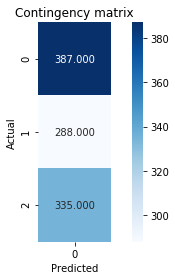

In [35]:
# using the highest siluette coeff
tmp = data.drop('Classical music', axis = 1)
use_this_cluster = DBSCAN(eps = 1, min_samples = 2, metric = "euclidean").fit(tmp)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Classical music'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()